In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import os
from random import choices

In [6]:
from dotenv import load_dotenv
load_dotenv(dotenv_path='/Users/daniel/OAN/SID/.env')

True

In [7]:
from OSMPythonTools.api import Api
# Tool to search OSM data by name and address
from OSMPythonTools.nominatim import Nominatim
# read-only API that serves up custom selected parts of the OSM map data
from OSMPythonTools.overpass import overpassQueryBuilder, Overpass
from shapely.geometry import Point, Polygon

In [8]:
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from time import sleep

In [9]:
from googleapiclient.http import MediaFileUpload, MediaIoBaseDownload
from oauth2client import file,client, tools
from googleapiclient import discovery
from httplib2 import Http
## CONECTION TO DRIVE

SCOPES = ['https://www.googleapis.com/auth/drive'
        ]
store = file.Storage('/Users/daniel/OAN/credentials/storage.json')
creds = store.get()
if not creds or creds.invalid:
    flow = client.flow_from_clientsecrets('/Users/daniel/OAN/credentials/credentials.json', SCOPES)
    creds = tools.run_flow(flow, store)
drive_service = discovery.build('drive', 'v3', http=creds.authorize(Http()))

In [10]:
def upload_to_drive(file,filename,mimetype,folder_id):
    
    
    #metadatos del archivo
    file_metadata = {
        'name': filename,
        'parents': folder_id
    }
    media = MediaFileUpload(file,
                            mimetype=mimetype,
                            resumable=True)
    file = drive_service.files().create(body=file_metadata,
                                        media_body=media,
                                        supportsAllDrives=True,
                                        fields='id').execute()
    return file.get('id')

In [11]:
#https://www.johndcook.com/blog/python_longitude_latitude/
def distance_on_unit_sphere(lat1, long1, lat2, long2):
    # Convert latitude and longitude to
    # spherical coordinates in radians.
    degrees_to_radians = math.pi/180.0

    # phi = 90 - latitude
    phi1 = (90.0 - lat1)*degrees_to_radians
    phi2 = (90.0 - lat2)*degrees_to_radians

    # theta = longitude
    theta1 = long1*degrees_to_radians
    theta2 = long2*degrees_to_radians

    # Compute spherical distance from spherical coordinates.

    # For two locations in spherical coordinates
    # (1, theta, phi) and (1, theta', phi')
    # cosine( arc length ) =
    # sin phi sin phi' cos(theta-theta') + cos phi cos phi'
    # distance = rho * arc length

    cos = (math.sin(phi1)*math.sin(phi2)*math.cos(theta1 - theta2) +
    math.cos(phi1)*math.cos(phi2))
    arc = math.acos( cos )

    # Remember to multiply arc by the radius of the earth
    # in your favorite set of units to get length.
    return arc

### SISTEMATIC

In [12]:
pd_villages = pd.read_gbq('SELECT * FROM `sidhouses.osm_data.villages`')

In [13]:
driver = webdriver.Chrome(executable_path=
                          r'/Users/daniel/OAN/SID/chromedriver')

In [14]:
link = pd_villages[pd_villages['name'].str.lower() == 'monnon']['link'].values[0]

In [15]:
driver.get(link)
sleep(2)

In [16]:
username = 'd.alfaro@oaninternational.org'
password = os.environ['OSM_PASS']

In [17]:
driver.find_element_by_id('username').send_keys(username)
sleep(2)

In [18]:
driver.find_element_by_id('password').send_keys(password)
sleep(2)

In [19]:
driver.find_element_by_name('commit').click()
sleep(3)

In [20]:
driver.refresh()

In [21]:
no_none = pd_villages[(pd_villages['name'].apply(str) != 'None') &
                      (pd_villages['name'].apply(str) != '') &
                      (pd_villages['name'].apply(lambda x: 'unkno' not in str(x)))]['area_id'].to_list()

In [22]:
len(no_none)

218

In [23]:
print(pd_villages[(pd_villages['name'].apply(str) != 'None') &
                      (pd_villages['name'].apply(str) != '') &
                      (pd_villages['name'].apply(lambda x: 'unkno' not in str(x)))]['name'].to_list())

['Téparè Sorè', 'Kourel', 'Kakatinnin', 'Bonyakou', 'Wouro Gorado', 'Tchafrico', 'Bognakou', 'Sarawori', 'Gourè Bogel', 'ALPHA KPAROU', 'Gandosin', 'CHEIN-DAROUKPARA', 'GAH SAKEROU', 'BIO SIKA KPAROU', 'GBÉNOUROU', 'GANDO BAKA', 'Waré', 'SÉMAROU', 'SORIA KPA', 'KPEBOURABOU', 'GBABIRÉ', 'TASSO PEUHL (KERTIA 1)', 'GBABIRÉ ZONGO', 'DJONWOURO KPAROU', 'SANGOUDÉ', 'KPIRÉ', 'Ouenou', 'Angarédébou', 'Danmonsi-Dakarou', 'Sakérou', 'Gouto', 'Sinankiki', 'SOUBO-GANDEROU', 'Gourou-Pibou', 'SONKOROU', 'BOUÉGOUROU', 'BASSIAROU', 'Angara', 'Dassarou', 'DADAGOURIAN 2', 'DADAGOURIAN', 'BACOUBÉ', 'COPÈRÈ', 'TEBO GANDO - ICHOGANDOU', 'TEBO', 'SARAWONDO - SARAVONDO', 'BIRO', 'SONSORÉ', 'GANDO BENIN', 'NALLOU', 'GBABA', 'OURAROU', 'TRABO', 'SERGENT KPAROU', 'GAOUDE', 'BAH BORÉ', 'MASSIAGOUROU', 'GNANHOUN', 'WABOUDO', 'NINGOUAROU', 'SÉROU', 'DEBBO', 'SONKOROU', 'GNEL DAMA', 'GONGUÉ KPAROU', 'Alafiarou-Dérassi', 'SINANGOUROU', 'DAROUKPAROU', 'GNANNOUBERE', 'GANSON - GANCHON', 'SOUMAROU', 'GANDO PÉNÉRÉ', 'GA

In [24]:
area_ids = choices(no_none, k=60)

In [25]:
#filter
y_1 = 70
y_n = 850
x_0 = 0
x_n = 1880
houses_in_pic = []
image_datas = []

WHAT LAYER ARE YOU USINGm


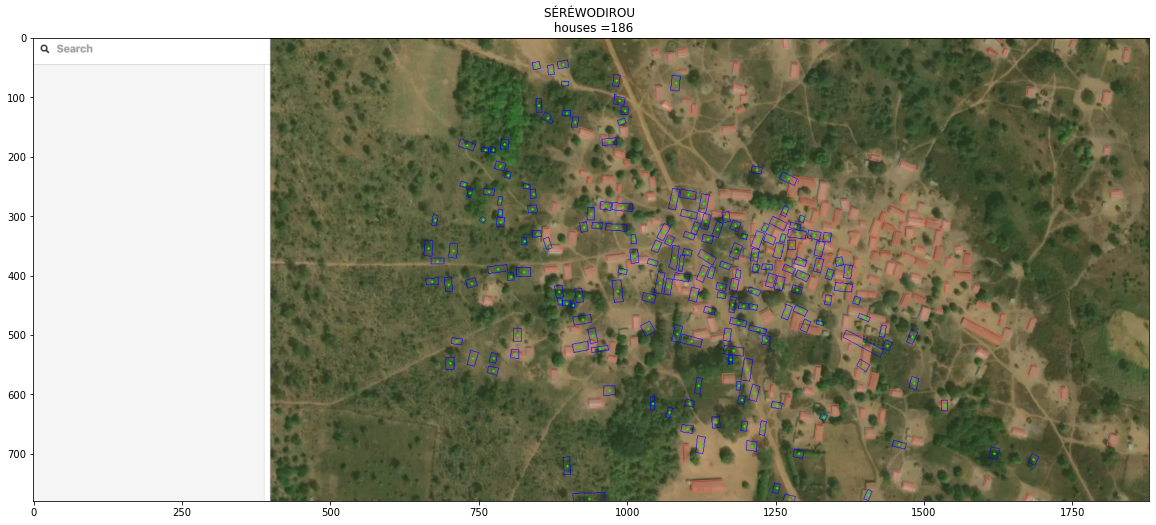

Data correct [y|n]n
WHAT LAYER ARE YOU USINGe
[overpass] downloading data: [timeout:25][out:json];area(3138649133)->.searchArea;(way[building](area.searchArea);); out geom;


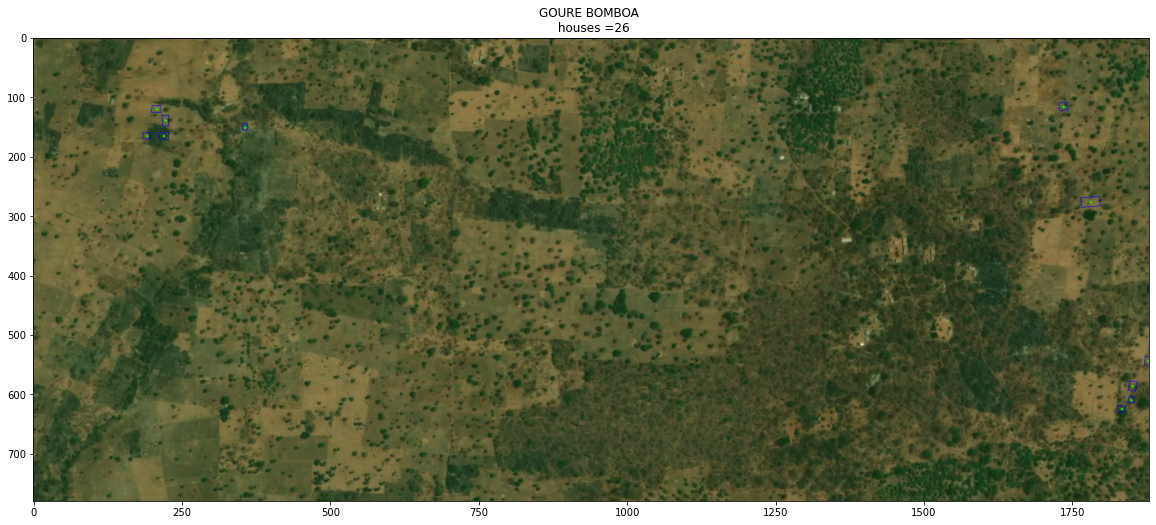

In [ ]:
for a_id in area_ids:
    #GET VILLAGE DATA
    vil_row = pd_villages[(pd_villages['area_id'] == a_id) & 
                          (pd_villages['name'].apply(str) != 'None') ]
    vil_lat = round(float(vil_row['lat'].values[0]),5)
    vil_lon = round(float(vil_row['lon'].values[0]),5)
    zoom = 18
    
    #OPEN PICTURE
    link = 'https://www.openstreetmap.org/edit?editor=id#map='
    link = link + str(zoom)+'/'+str(vil_lat)+'/'+str(vil_lon)
    driver.get(link)
    sleep(1)
    driver.get(link)
    sleep(1)
    l_layer=input('WHAT LAYER ARE YOU USING')
    layer = 'maxar'
    
    if l_layer == 'm':
        layer='maxar'
        
    elif l_layer == 'e':
        layer='esri'
        
    elif l_layer == 'b':
        layer='bing'
        
    elif l_layer == 'x':
        layer='mapbox'
        
    else:
        layer=l_layer
    
    #SAVE PICTURE
    vil_lon = float(driver.current_url.split('/')[-1])
    vil_lat = float(driver.current_url.split('/')[-2])
    image_file = '/Users/daniel/OAN/SID/poc/osm/'+vil_row['name'].values[0]+'_ss.png'
    driver.save_screenshot(image_file)
    img = cv2.imread(image_file)
    y_0 = img.shape[0]-948
    img_0 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)[y_0:,:,:]
    
    #GET BUILDINGS DATA
    building_query = overpassQueryBuilder(
                area=a_id, elementType='way', selector="building", out="geom")

    # Make the query
    building_res = Overpass().query(building_query)
    DEG_to_KM2 = 13000
    DEG_to_KM = 130

    # Transform response into json
    building_json = building_res.toJSON()
    new_building_data = []

    # Loop throught the elements in the response
    for ele in building_json['elements']:
        geo_df = pd.DataFrame.from_records(ele['geometry'])
        poly = Polygon(zip(geo_df['lon'], geo_df['lat']))
        point = Point(poly.centroid.x, poly.centroid.y)
        boudary_lat = str(geo_df['lat'].tolist())
        boudary_lon = str(geo_df['lon'].tolist())
        ele_row = {
            'id':ele.get('id', 0),                    # osm_id
            'type':ele.get('type', ''),                 # type
            'village':vil_row['name'].values[0],
            'district':vil_row['district'].values[0],         # district
            'center':point,                           # point
            'center_y':str(poly.centroid.y),               # lat
            'center_x':str(poly.centroid.x),               # lon
            'perim':str(poly.length * DEG_to_KM),       # perim
            'area':str(poly.area * DEG_to_KM2),        # area
            'boudary_lat':boudary_lat,                        # boudary_lat
            'boudary_lon':boudary_lon                        # boudary_lon
        }

        new_building_data.append(ele_row)

    #CONVERSION DATA
    earth_radius= 6378137
    d_lat = distance_on_unit_sphere(vil_lat, vil_lon, vil_lat+1, vil_lon)*earth_radius
    d_lon = distance_on_unit_sphere(vil_lat, vil_lon, vil_lat, vil_lon+1)*earth_radius

    const =  2 * math.pi * earth_radius /256
    m_per_px = const * math.cos(vil_lat * math.pi / 180) / math.pow(2, zoom)
    deg_per_m_lat = 1 / (d_lat) 
    deg_per_m_lon = 1 / (d_lon)

    img_size_deg_lat = m_per_px * deg_per_m_lat * img_0.shape[0]  # m/px * deg/m * px = deg
    img_size_deg_lon = m_per_px * deg_per_m_lon * img_0.shape[1]  # m/px * deg/m * px = deg

    lat_0 = vil_lat + (img_size_deg_lat / 2)
    lon_0 = vil_lon - (img_size_deg_lon / 2)

    deg_per_px_lat = deg_per_m_lat*m_per_px
    deg_per_px_lon = deg_per_m_lon*m_per_px
     
    
    im_corr = img_0.copy()[y_1:y_n,x_0:x_n,:]
    
    image_file_corr = '/Users/daniel/OAN/SID/poc/osm/'+vil_row['name'].values[0]+'.png'
    cv2.imwrite(image_file_corr,cv2.cvtColor(im_corr,cv2.COLOR_RGB2BGR))
    
    drive_id = upload_to_drive(image_file_corr,
                           vil_row['name'].values[0]+'.png',
                           'image/png',
                           ['1MnX6OHQs_wUSosNrMkBkGlPpVuExC3UU'])
    

    houses_in_pic_vill = []
    for i,build in enumerate(new_building_data):
        lat = float(build['center_y'])
        lon = float(build['center_x'])
        boudary_lat = eval(build['boudary_lat'])
        boudary_lon = eval(build['boudary_lon'])

        #pic_data of house
        lat_px = (lat_0 - lat) / deg_per_px_lat
        lon_px = (lon - lon_0) / deg_per_px_lon
        house = [[(float(lonn) - lon_0) / deg_per_px_lon,(lat_0 - float(latt)) / deg_per_px_lat]
                 for latt,lonn in zip(boudary_lat,boudary_lon)
                ]
        #update_data
        new_building_data[i]['house'] = house
        new_building_data[i]['lat_px'] = int(lat_px)
        new_building_data[i]['lon_px'] = int(lon_px)

        filt = (y_0 < lat_px) & (lat_px < y_n) & (x_0 < lon_px) & (lat_px < x_n) 
        
        if filt:
            house_corr = [[(float(lonn) - lon_0) / deg_per_px_lon,((lat_0 - float(latt)) / deg_per_px_lat) -y_1]
                 for latt,lonn in zip(boudary_lat,boudary_lon)
                ]
            
            house_pic = {
                'drive_id':drive_id,
                'id':build['id'],
                'house':house_corr,
                'lat_px':int(round(lat_px-y_1,0)),
                'lon_px':int(round(lon_px,0))
            }
            houses_in_pic.append(house_pic)
            houses_in_pic_vill.append(house_pic)
    
    image_data ={
        'drive_id':drive_id,
        'village_name':vil_row['name'].values[0],
        'path':image_file_corr,
        'lat_0':lat_0,
        'lon_0':lon_0,
        'deg_per_px_lat':deg_per_px_lat,
        'deg_per_px_lon':deg_per_px_lon,
        'n_houses':len(houses_in_pic_vill),
        'layer':layer
    }
    
    for build in houses_in_pic_vill:

        lat_px = build['lat_px']
        lon_px = build['lon_px']
        house = build['house']

        cv2.circle(im_corr, (int(lon_px), int(lat_px)), 2, (0, 255, 0), -1)
        vertices = np.array(house,dtype=np.int32)
        pts = vertices.reshape((-1,1,2))
        cv2.polylines(im_corr,[pts],isClosed=True,color=(0,0,255),thickness=1)

    plt.figure(figsize=(20,10))
    plt.imshow(im_corr)
    plt.title(vil_row['name'].values[0]+' \n houses ={}'.format(len(houses_in_pic_vill)))
    plt.show()
    
    correction = input('Data correct [y|n]')
    
    if correction == 'y':
        image_datas.append(image_data)
    elif correction == 'n':
        continue
    else:
        break

## SAVE DATA

In [26]:
df_houses = pd.DataFrame(houses_in_pic)

In [27]:
df_houses.shape

(3246, 5)

In [29]:
df_houses.to_gbq('output_data.image_ds','sidhouses')

1it [00:02,  2.33s/it]


In [30]:
df_images = pd.DataFrame(image_datas)

In [31]:
df_images.shape

(52, 9)

In [35]:
df_images.to_gbq('osm_data.image_ds_info','sidhouses')

1it [00:02,  2.33s/it]


### FROM SCREENSHOT OF BUILDINGS

In [7]:
monnon_0 = cv2.imread('/Users/daniel/OAN/SID/poc/osm/monnon_0.png')

In [10]:
img_monnon_0 = cv2.cvtColor(monnon_0,cv2.COLOR_BGR2RGB)

In [14]:
img_monnon_0.shape

(1600, 2560, 3)

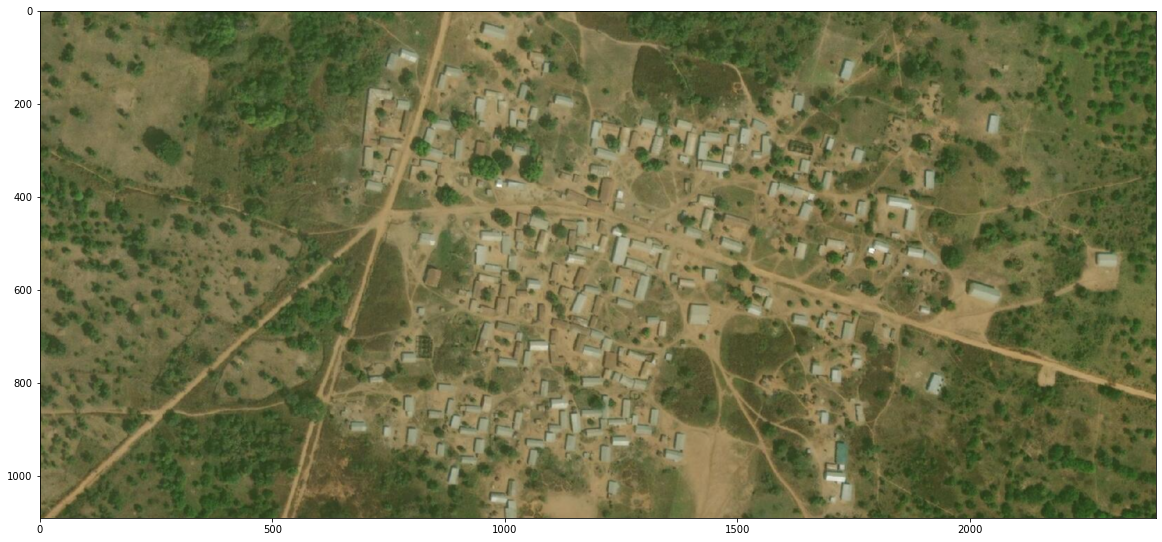

In [16]:
plt.figure(figsize=(20,10))
plt.imshow(img_monnon_0[410:1500,0:2400,:])

In [40]:
monnon_1 = cv2.imread('/Users/daniel/OAN/SID/poc/osm/monnon_1.png')

In [41]:
img_monnon_1 = cv2.cvtColor(monnon_1,cv2.COLOR_BGR2RGB)

In [42]:
img_monnon_1.shape

(1600, 2560, 3)

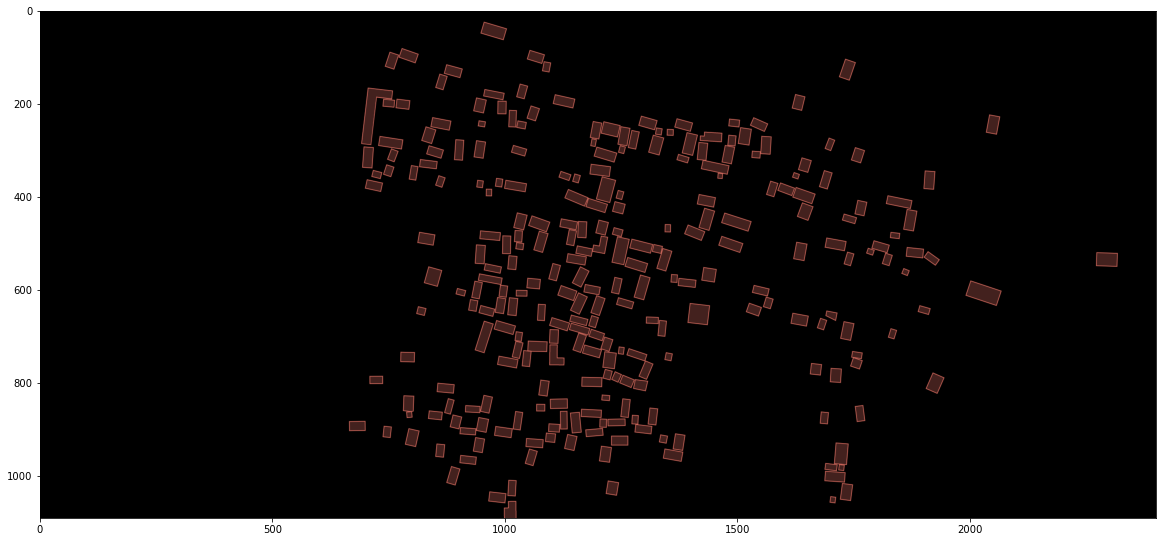

In [43]:
plt.figure(figsize=(20,10))
plt.imshow(img_monnon_1[410:1500,0:2400,:])

In [44]:
img_mask = img_monnon_1[410:1500,0:2400,0]

In [58]:
th, img_th = cv2.threshold(img_mask,100,255,cv2.THRESH_BINARY)

In [ ]:
img_mask_pix

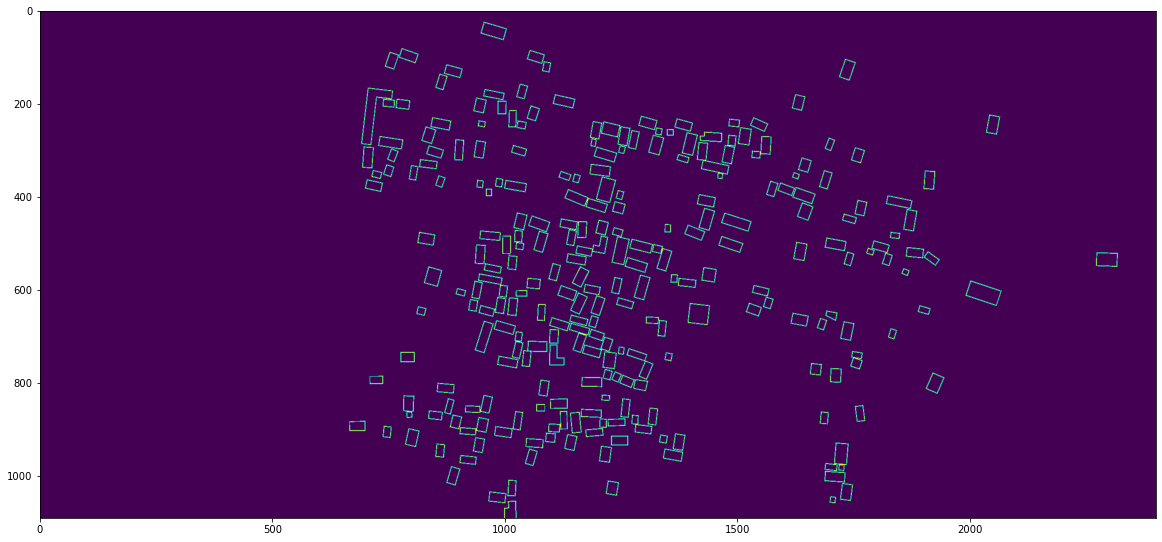

In [59]:
plt.figure(figsize=(20,10))
plt.imshow(img_th)

In [54]:
img_mask.shape

(1090, 2400)

In [66]:
img_brut = img_monnon_0.copy()[410:1500,0:2400,:]
contours, hierarchy = cv2.findContours(img_th.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
builds = []
# For every entry in contours
for i,c in enumerate(contours):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(img_brut, contours, i, (255, 0, 0), 2)
        
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cv2.circle(img_brut, (cX, cY), 7, (0, 255, 0), -1)
        builds.append((cX, cY))

In [55]:
img_mask_pix = img_mask.reshape(img_mask.shape[0]*img_mask.shape[1],1)

In [57]:
np.unique(img_mask_pix)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

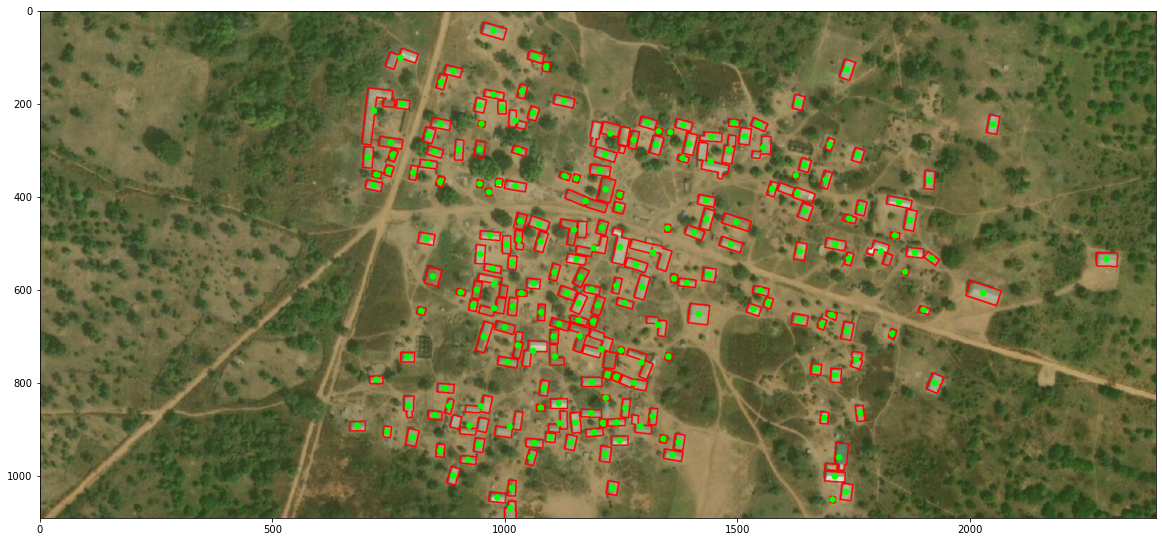

In [67]:
plt.figure(figsize=(20,10))
plt.imshow(img_brut)

In [68]:
len(builds)

213

#### FROM SCREEN AND OSM API

In [5]:
pd_villages = pd.read_gbq('SELECT * FROM `sidhouses.osm_data.villages`')

In [6]:
driver = webdriver.Chrome(executable_path=
                          r'/Users/daniel/OAN/SID/chromedriver')

In [7]:
link = pd_villages[pd_villages['name'].str.lower() == 'monnon']['link'].values[0]

In [8]:
driver.get(link)

In [9]:
username = 'd.alfaro@oaninternational.org'
password = os.environ['OSM_PASS']

In [10]:
driver.find_element_by_id('username').send_keys(username)
sleep(2)

In [11]:
driver.find_element_by_id('password').send_keys(password)
sleep(2)

In [12]:
driver.find_element_by_name('commit').click()
sleep(2)

In [13]:
driver.refresh()

In [54]:
no_none = pd_villages[(pd_villages['name'].apply(str) != 'None')]['area_id'].to_list()

In [55]:
area_ids = choices(no_none, k=50)

## FIRST EXAMPLE

In [56]:
a_id = area_ids[0]

In [57]:
vil_row = pd_villages[(pd_villages['area_id'] == a_id)]
vil_row

osm_id     area_id type    place district  name  \
419  737033627  3137033627  way  village   Ouenou  SABO   

                                                 link               lat  \
419  https://www.openstreetmap.org/edit?way=737033627  9.87631994081352   

                  lon             perim               area  \
419  3.33605737409378  2.19027434570008  0.181666389774996   

                                          boundary_lat  \
419  [9.8768247, 9.8750136, 9.8744343, 9.8735693, 9...   

                                          boundary_lon  nb_buildings  \
419  [3.3332353, 3.3363223, 3.337076, 3.3375978, 3....            -1   

     build_dens  pop_est  building_density  population_est_building  
419         0.0      0.0               NaN                      NaN

In [58]:
vil_lat = round(float(vil_row['lat'].values[0]),5)
vil_lon = round(float(vil_row['lon'].values[0]),5)
zoom = 18
vil_lon

3.33606

In [59]:
link = 'https://www.openstreetmap.org/edit?editor=id#map='
link = link + str(zoom)+'/'+str(vil_lat)+'/'+str(vil_lon)
link

'https://www.openstreetmap.org/edit?editor=id#map=18/9.87632/3.33606'

In [70]:
driver.get(link)
sleep(1)
driver.get(link)

In [73]:
body = driver.find_element_by_css_selector('body')

In [74]:
actions = ActionChains(driver)
actions.send_keys('2')
actions.pause(1)
actions.click(on_element=body)
actions.pause(1)
actions.send_keys('2')
actions.pause(2)
actions.send_keys('`')
actions.pause(2)

actions.perform()

In [82]:
vil_lon = float(driver.current_url.split('/')[-1])
vil_lat = float(driver.current_url.split('/')[-2])
print(vil_lat,vil_lon)

9.87509 3.33741


In [84]:
image_file = '/Users/daniel/OAN/SID/poc/osm/'+vil_row['name'].values[0]+'_ss.png'
driver.save_screenshot(image_file)

True

In [85]:
img = cv2.imread(image_file)

In [108]:
img.shape[0]

1001

In [109]:
y_0 = img.shape[0]-948
y_0

53

In [110]:
img_0 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)[y_0:,:,:]

In [111]:
img_0.shape

(948, 1920, 3)

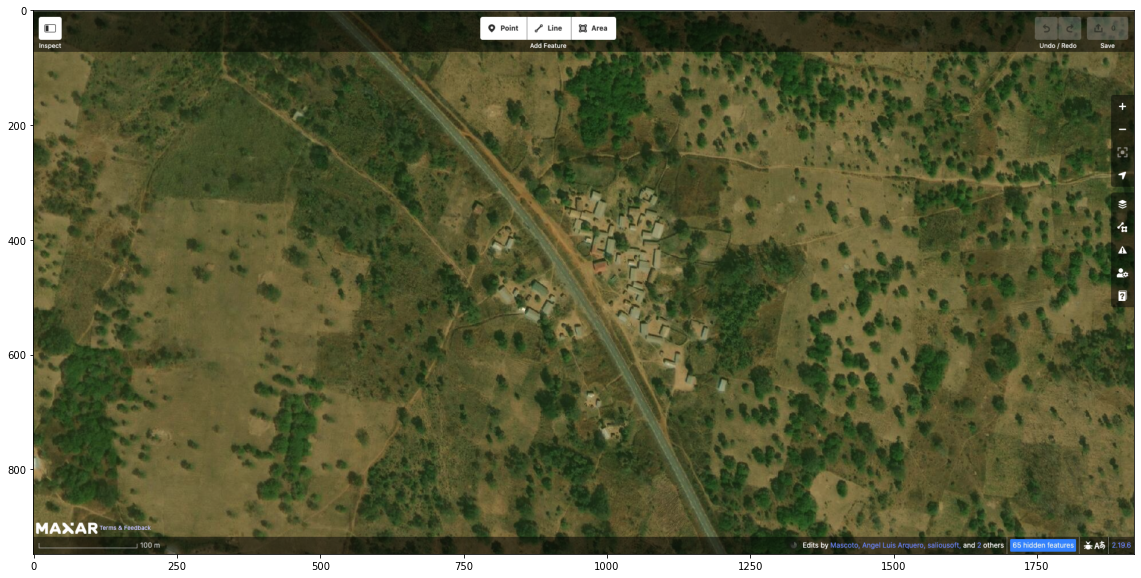

In [157]:
plt.figure(figsize=(20,10))
plt.imshow(img_0)

In [164]:
building_query = overpassQueryBuilder(
                area=a_id, elementType='way', selector="building", out="geom")

# Make the query
building_res = Overpass().query(building_query)
DEG_to_KM2 = 13000
DEG_to_KM = 130

# Transform response into json
building_json = building_res.toJSON()
new_building_data = []

# Loop throught the elements in the response
for ele in building_json['elements']:
    geo_df = pd.DataFrame.from_records(ele['geometry'])
    poly = Polygon(zip(geo_df['lon'], geo_df['lat']))
    point = Point(poly.centroid.x, poly.centroid.y)
    boudary_lat = str(geo_df['lat'].tolist())
    boudary_lon = str(geo_df['lon'].tolist())
    ele_row = {
        'id':ele.get('id', 0),                    # osm_id
        'type':ele.get('type', ''),                 # type
        'village':village_row_df['name'].values[0],
        'district':village_row_df['district'].values[0],         # district
        'center':point,                           # point
        'center_y':str(poly.centroid.y),               # lat
        'center_x':str(poly.centroid.x),               # lon
        'perim':str(poly.length * DEG_to_KM),       # perim
        'area':str(poly.area * DEG_to_KM2),        # area
        'boudary_lat':boudary_lat,                        # boudary_lat
        'boudary_lon':boudary_lon                        # boudary_lon
    }

    new_building_data.append(ele_row)


In [165]:
len(new_building_data)

59

In [167]:
earth_radius= 6378137
d_lat = distance_on_unit_sphere(vil_lat, vil_lon, vil_lat+1, vil_lon)*earth_radius
d_lon = distance_on_unit_sphere(vil_lat, vil_lon, vil_lat, vil_lon+1)*earth_radius

const =  2 * math.pi * earth_radius /256
m_per_px = const * math.cos(vil_lat * math.pi / 180) / math.pow(2, zoom)
m_per_px

0.5883166862316187

In [168]:
#m_per_px=0.596 in equator

In [169]:
deg_per_m_lat = 1 / (d_lat) 
deg_per_m_lon = 1 / (d_lon)

img_size_deg_lat = m_per_px * deg_per_m_lat * img_0.shape[0]  # m/px * deg/m * px = deg
img_size_deg_lon = m_per_px * deg_per_m_lon * img_0.shape[1]  # m/px * deg/m * px = deg

lat_0 = vil_lat + (img_size_deg_lat / 2)
lon_0 = vil_lon - (img_size_deg_lon / 2)

deg_per_px_lat = deg_per_m_lat*m_per_px
deg_per_px_lon = deg_per_m_lon*m_per_px

print(deg_per_px_lat,deg_per_px_lon)

5.284938711444646e-06 5.364420032462822e-06


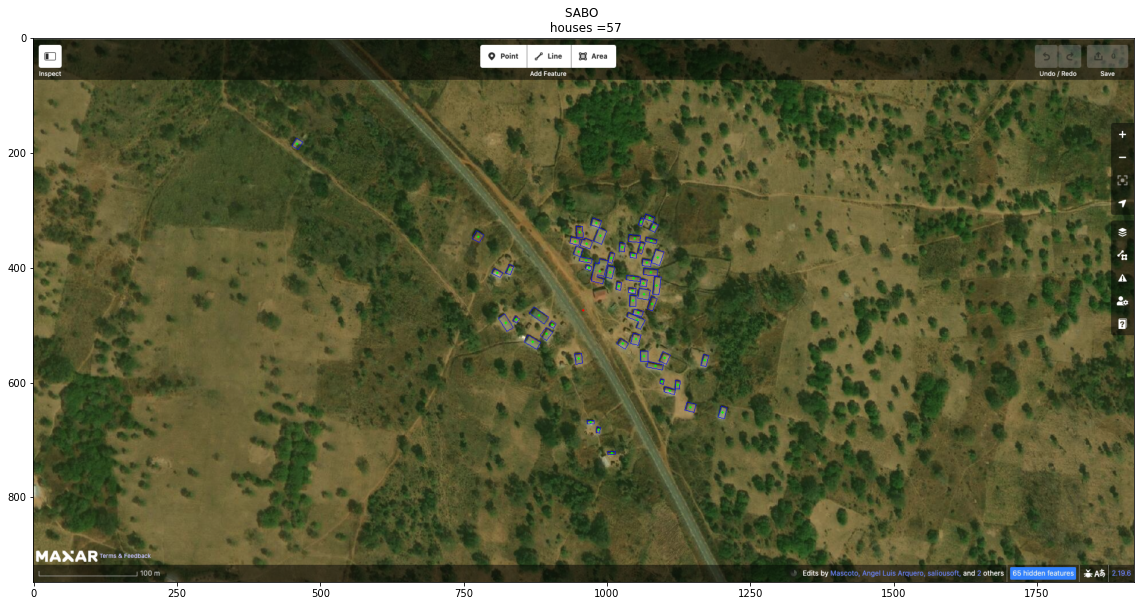

In [206]:
img_copy = img_0.copy()
houses_in_pic = [] 
for i,build in enumerate(new_building_data):
    lat = float(build['center_y'])
    lon = float(build['center_x'])
    boudary_lat = eval(build['boudary_lat'])
    boudary_lon = eval(build['boudary_lon'])
    
    #pic_data of house
    lat_px = (lat_0 - lat) / deg_per_px_lat
    lon_px = (lon - lon_0) / deg_per_px_lon
    house = [[(float(lonn) - lon_0) / deg_per_px_lon,(lat_0 - float(latt)) / deg_per_px_lat]
             for latt,lonn in zip(boudary_lat,boudary_lon)
            ]
    #update_data
    new_building_data[i]['house'] = house
    new_building_data[i]['lat_px'] = int(lat_px)
    new_building_data[i]['lon_px'] = int(lon_px)
    
    #filter
    y_0 = 70
    y_n = 850
    x_0 = 0
    x_n = 1880
    filt = (y_0 < lat_px) & (lat_px < y_n) & (x_0 < lon_px) & (lat_px < x_n) 
    if filt:
        #draw
        cv2.circle(img_copy, (int(lon_px), int(lat_px)), 2, (0, 255, 0), -1)
        vertices = np.array(house,dtype=np.int32)
        pts = vertices.reshape((-1,1,2))
        cv2.polylines(img_copy,[pts],isClosed=True,color=(0,0,255),thickness=1)
        
        house_corr = [[(float(lonn) - lon_0) / deg_per_px_lon,((lat_0 - float(latt)) / deg_per_px_lat) -y_0]
             for latt,lonn in zip(boudary_lat,boudary_lon)
            ]
        house_pic = {
            'id':build['id'],
            'house':house_corr,
            'lat_px':int(round(lat_px-y_0,0)),
            'lon_px':int(round(lon_px,0))
        }
        houses_in_pic.append(house_pic)

    
lat_px = (lat_0 - vil_lat) / deg_per_px_lat
lon_px = (vil_lon - lon_0) / deg_per_px_lon
cv2.circle(img_copy, (int(lon_px), int(lat_px)), 2, (255, 0, 0), -1)

plt.figure(figsize=(20,10))
plt.imshow(img_copy)
plt.title(vil_row['name'].values[0]+' \n houses ={}'.format(len(houses_in_pic)))
plt.show()

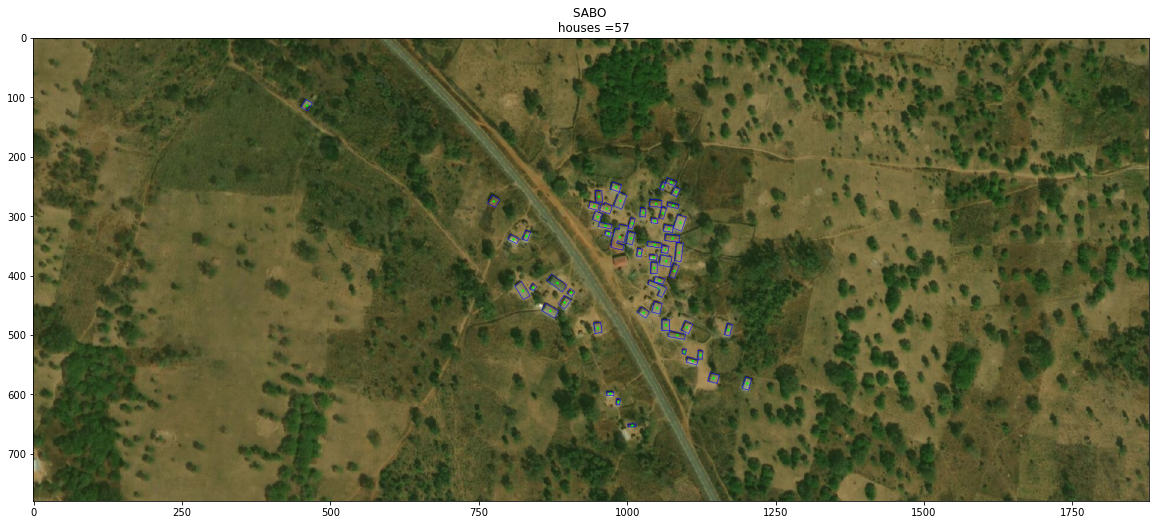

In [207]:
img_copy = img_0.copy()[y_0:y_n,x_0:x_n,:]
for build in houses_in_pic:

    lat_px = build['lat_px']
    lon_px = build['lon_px']
    house = build['house']

    cv2.circle(img_copy, (int(lon_px), int(lat_px)), 2, (0, 255, 0), -1)
    vertices = np.array(house,dtype=np.int32)
    pts = vertices.reshape((-1,1,2))
    cv2.polylines(img_copy,[pts],isClosed=True,color=(0,0,255),thickness=1)

plt.figure(figsize=(20,10))
plt.imshow(img_copy)
plt.title(vil_row['name'].values[0]+' \n houses ={}'.format(len(houses_in_pic)))
plt.show()

In [210]:
im_corr = img_0.copy()[y_0:y_n,x_0:x_n,:]
image_file_corr = '/Users/daniel/OAN/SID/poc/osm/'+vil_row['name'].values[0]+'.png'
cv2.imwrite(image_file_corr,cv2.cvtColor(im_corr,cv2.COLOR_RGB2BGR))
drive_id = upload_to_drive(image_file_corr,
                           vil_row['name'].values[0]+'.png',
                           'image/png',
                           ['1MnX6OHQs_wUSosNrMkBkGlPpVuExC3UU'])

In [203]:
image_data ={
    'drive_id':drive_id,
    'name':vil_row['name'].values[0]+'_ss.png',
    'lat_0':lat_0,
    'lon_0':lon_0,
    'deg_per_px_lat':deg_per_px_lat,
    'deg_per_px_lon':deg_per_px_lon,
    'n_houses':len(houses_in_pic)
    
}

In [204]:
len(new_building_data)

59